In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING DATASET

In [2]:
df = pd.read_csv('data/microbes.csv', index_col=0)
df.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


# ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30527 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         30527 non-null  float64
 1   Eccentricity     30527 non-null  float64
 2   EquivDiameter    30527 non-null  float64
 3   Extrema          30527 non-null  float64
 4   FilledArea       30527 non-null  float64
 5   Extent           30527 non-null  float64
 6   Orientation      30527 non-null  float64
 7   EulerNumber      30527 non-null  float64
 8   BoundingBox1     30527 non-null  float64
 9   BoundingBox2     30527 non-null  float64
 10  BoundingBox3     30527 non-null  float64
 11  BoundingBox4     30527 non-null  float64
 12  ConvexHull1      30527 non-null  float64
 13  ConvexHull2      30527 non-null  float64
 14  ConvexHull3      30527 non-null  float64
 15  ConvexHull4      30527 non-null  float64
 16  MajorAxisLength  30527 non-null  float64
 17  MinorAxisLen

In [4]:
df.isnull().any()

Solidity           False
Eccentricity       False
EquivDiameter      False
Extrema            False
FilledArea         False
Extent             False
Orientation        False
EulerNumber        False
BoundingBox1       False
BoundingBox2       False
BoundingBox3       False
BoundingBox4       False
ConvexHull1        False
ConvexHull2        False
ConvexHull3        False
ConvexHull4        False
MajorAxisLength    False
MinorAxisLength    False
Perimeter          False
ConvexArea         False
Centroid1          False
Centroid2          False
Area               False
raddi              False
microorganisms     False
dtype: bool

# FEATURE ENGINEERING

CREATING A LABEL FOR EACH OBJECT IN **MICROORGANISMS** COLUMN

The number assignation is ordered from less to most common microorganism for a better further visualization.

In [5]:
micro = df['microorganisms'].value_counts(ascending=True).index
labels = {micro[i]:int(i) for i in range(len(micro))}
labels

{'Spirogyra': 0,
 'Penicillum': 1,
 'Pithophora': 2,
 'Diatom': 3,
 'Raizopus': 4,
 'Yeast': 5,
 'Aspergillus sp': 6,
 'Protozoa': 7,
 'Volvox': 8,
 'Ulothrix': 9}

In [6]:
data = df.copy()
data['microorganisms'] = data['microorganisms'].map(lambda x: labels[x])

In [7]:
data[['microorganisms']].head()

,microorganisms
0,0
1,0
2,0
3,0
4,0


In [8]:
data[['microorganisms']].tail()

,microorganisms
30522,9
30523,9
30524,9
30525,9
30526,9


For classification we need to equalize the number of each target class.

In [9]:
data['microorganisms']

0        0
1        0
2        0
3        0
4        0
        ..
30522    9
30523    9
30524    9
30525    9
30526    9
Name: microorganisms, Length: 30527, dtype: int64

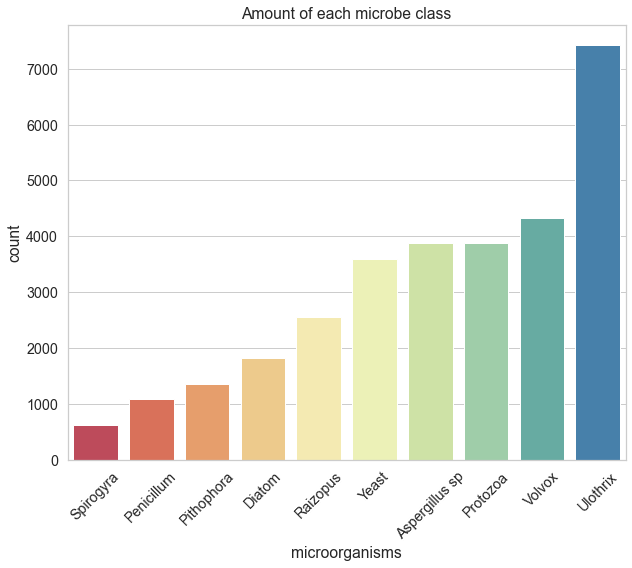

In [10]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
sns.countplot(x='microorganisms', data=data, palette='Spectral')
plt.title('Amount of each microbe class')
plt.xticks(ticks=list(labels.values()), labels=list(labels.keys()), rotation=45);

Ulothrix has around 3000 more entries than the second most common, Volvox. Let's find the mean.

In [11]:
microbes_mean = int(data['microorganisms'].value_counts().mean())
microbes_mean

3052

Once got the mean of the number of classes appeared, around 3052 will be the maximum number of entries for each class for the train split, providing full variety of classes. The rest will be left for test.

**HANDLING OUTLIERS**

In [12]:
desc = data.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Solidity,30527.0,9.677744,4.063437,0.0,6.5700,9.3500,12.6000,23.0
Eccentricity,30527.0,19.466921,3.479828,0.0,17.3000,20.7000,22.2000,23.0
EquivDiameter,30527.0,3.633348,2.210851,0.0,2.1800,3.3800,4.5800,23.0
Extrema,30527.0,11.871832,6.045135,0.0,6.7900,12.0000,17.2000,23.0
FilledArea,30527.0,0.420022,0.875091,0.0,0.0937,0.2290,0.4345,23.0
Extent,30527.0,5.840625,3.250999,0.0,3.2800,5.2600,7.8500,23.0
Orientation,30527.0,11.751004,6.575319,0.0,6.0050,12.1000,17.2000,23.0
EulerNumber,30527.0,22.380901,0.962906,0.0,22.3000,22.6000,22.9000,23.0
BoundingBox1,30527.0,10.919027,6.093280,0.0,5.6900,10.9000,15.8000,23.0
BoundingBox2,30527.0,10.399429,5.797144,0.0,5.7300,10.0000,14.9000,23.0


In [13]:
desc[(desc['mean']<3) & (desc['75%']<10)]

,count,mean,std,min,25%,50%,75%,max
FilledArea,30527.0,0.420022,0.875091,0.0,0.0937,0.2290,0.4345,23.0
BoundingBox3,30527.0,2.085481,2.166312,0.0,0.8490,1.5000,2.6600,23.0
BoundingBox4,30527.0,2.640499,2.488448,0.0,1.1500,1.9400,3.3800,23.0
MajorAxisLength,30527.0,1.605159,1.662537,0.0,0.6350,1.1600,2.0700,23.0
MinorAxisLength,30527.0,1.014179,1.224326,0.0,0.4210,0.7450,1.2200,23.0
Perimeter,30527.0,0.829416,1.152165,0.0,0.2530,0.5180,0.9680,23.0
ConvexArea,30527.0,0.254596,0.971035,0.0,0.0347,0.0857,0.2000,23.0
Area,30527.0,0.802780,1.170430,0.0,0.2180,0.5140,0.9340,23.0


These features have in common outliers or outlier of 23 being the mean and the 75% percentil so low.
But it's standard deviation is low too. Let's check the data.

In [14]:
out_list = ['FilledArea', 'BoundingBox3', 'BoundingBox4', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Area']
df_viz = data[out_list]

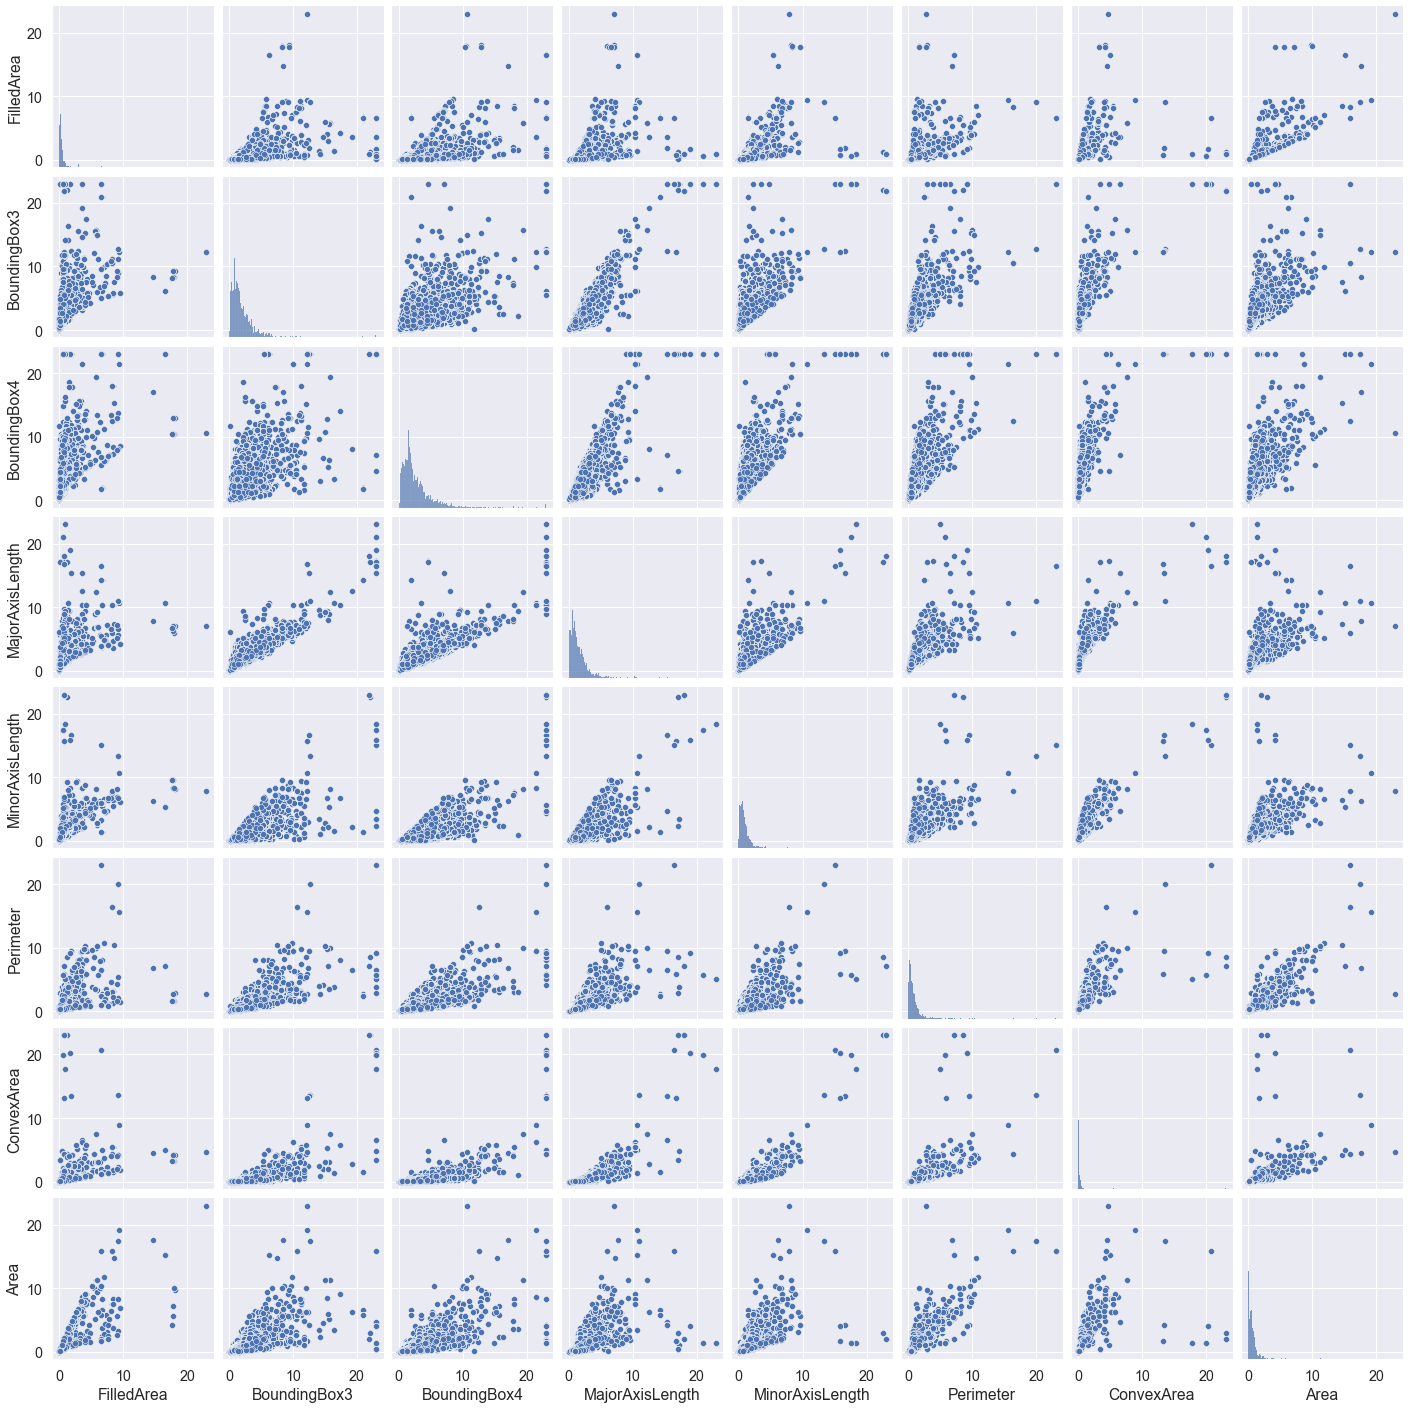

In [15]:
sns.set_style('darkgrid')
sns.pairplot(df_viz);

There's few outliers compared to the lenght of the dataser.

In [16]:
def out_remove(dataframe, features=list, max_outlier=int):
    
    for i in range(len(features)):
        dataframe = dataframe[dataframe[features[i]]<max_outlier]
    
    return dataframe

In [17]:
clean_df = out_remove(data, ['Area', 'BoundingBox3', 'BoundingBox4'], 12)
clean_df = out_remove(data, ['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ConvexArea', 'FilledArea'], 8)

In [18]:
print('Has been removed', len(df) - len(clean_df), 'outliers.')

Has been removed 364 outliers.


QUICK FEATURES CORRELATION VIEW

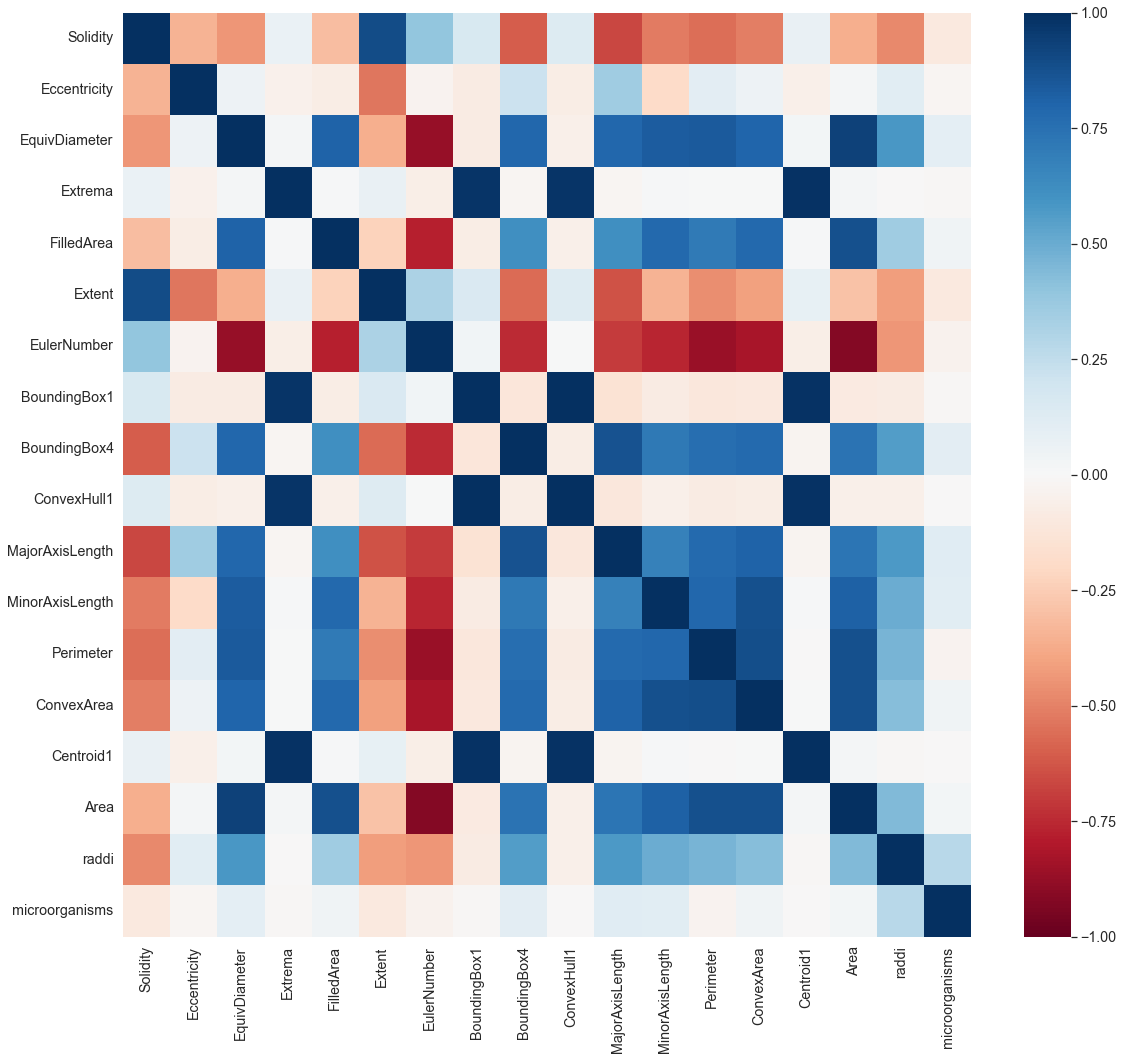

In [78]:
plt.figure(figsize=(19,17))
sns.heatmap(clean_df.corr(), annot=False, cmap='RdBu', vmin=-1, vmax=1);

ConvexHull1, ConvexHull2, ConvexHull3 and ConvexHull4 share the same correlation with the rest of the other features, so I procees to keep ConvexHull1 and drop the rest.

Centroid1 and Centroid2 have almost the same particularity but Centroid2 has less correlation, therefore off the dataset too. The same for BoundingBox.

Orientation is a feature that looks like it's not sharing much correlation with the rest, so better to get rid of it.

In [20]:
clean_df.drop(columns=[
    'ConvexHull2',
    'ConvexHull3',
    'ConvexHull4',
    'Centroid2',
    'Orientation',
    'BoundingBox2',
    'BoundingBox3',
    
], inplace=True)

# BUILDING THE MODEL

Let's declare a seed for **random_state**

In [21]:
seed = 42

TRAIN TEST SPLIT

In [22]:
equal_df = clean_df.iloc[:-microbes_mean, :]

X = equal_df.drop('microorganisms', axis=1)
y = equal_df['microorganisms']

Number of entries to set into test to ensure variety in train. Remember the dataset is ordered and the last class has a huge count difference than the others which is found in the last entries.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (21688, 17)
X_test: (5423, 17)
y_train: (21688,)
y_test: (5423,)


In [24]:
X_test = X_test.append(clean_df.iloc[-microbes_mean:, :].drop('microorganisms', axis=1))
y_test = y_test.append(clean_df['microorganisms'][-microbes_mean:])

C:\Users\malva\AppData\Local\Temp\ipykernel_18288\47676882.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(clean_df.iloc[-microbes_mean:, :].drop('microorganisms', axis=1))
C:\Users\malva\AppData\Local\Temp\ipykernel_18288\47676882.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test = y_test.append(clean_df['microorganisms'][-microbes_mean:])


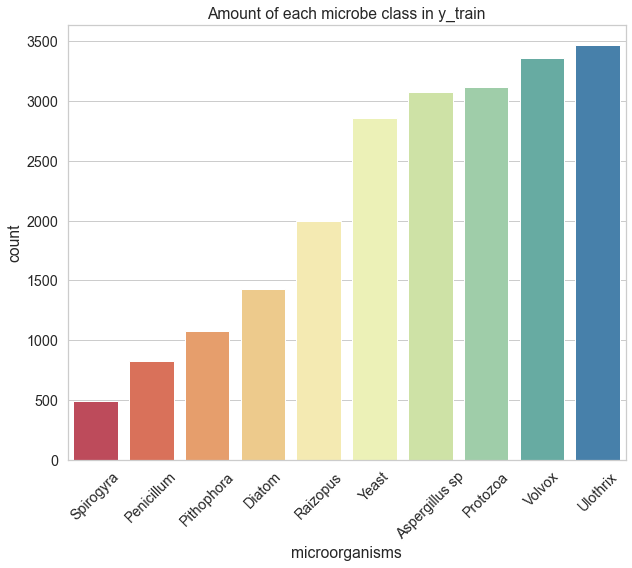

In [25]:
plt.figure(figsize=(10, 8))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
sns.countplot(x=y_train, palette='Spectral')
plt.title('Amount of each microbe class in y_train')
plt.xticks(ticks=list(labels.values()), labels=list(labels.keys()), rotation=45);

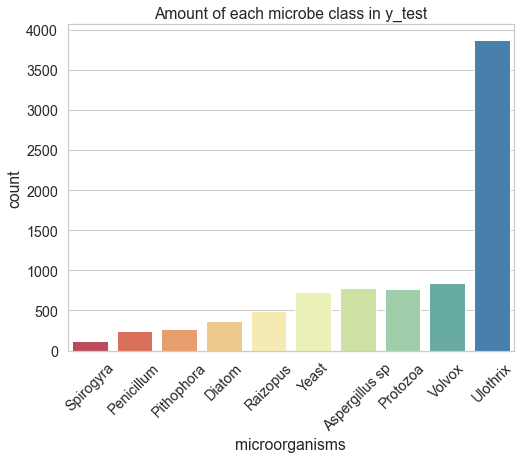

In [26]:
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.3)
sns.set_style('whitegrid')
sns.countplot(x=y_test, palette='Spectral')
plt.title('Amount of each microbe class in y_test')
plt.xticks(ticks=list(labels.values()), labels=list(labels.keys()), rotation=45);

SHUFFLE DATA

An extra shake to the data.

In [27]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

PIPELINE & RANDOMIZEDSEARCH

In [54]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Classification machine learning models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [29]:
# lr_param = {
#     "imputer__strategy": ['mean', 'median'],
#     "reglog__penalty": ['l1', 'l2'],
#     "reglog__C": np.logspace(0, 4, 10)
# }
# rf_param = {
#     "n_estimators": [10, 100, 1000],
#     "max_features": [1,2,3]
# }
# svm_param = {
#     'selectkbest__k': [2, 3, 4],
#     'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
#     'svm__C': [0.001, 0.1, 1, 10, 100],
#     'svm__degree': [1,2,3,4],
#     'svm__gamma': ['scale', 'auto']
# }
# dtc_param = {
#     'ccp_alpha': 0.01
# }
# knn_param = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }
# xgb_param = {
#     'n_estimators': [0, 2, 4, 6, 8, 10]
# }

KNEARESTNEIGHBORS CLASSIFIER

In [30]:
knn = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('knn', KNeighborsClassifier())])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.791386430678466

SVM

In [31]:
svm = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('svm', SVC(random_state=seed))])

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.5751032448377581

XGBOOST CLASSIFIER

In [32]:
xgb = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('xgb', XGBClassifier(random_state=seed, use_label_encoder=False))])

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc

[13:46:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.880117994100295

DECISION TREE CLASSIFIER

In [33]:
dt = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('tree', DecisionTreeClassifier(random_state=seed))])

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
dt_acc

0.8420058997050147

RANDOM FOREST CLASSIFIER

In [34]:
rf = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('tree', RandomForestClassifier(random_state=seed))])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.8841297935103245

In [44]:
models = {
    'Accuracy': [svm_acc, knn_acc, dt_acc, xgb_acc, rf_acc],
    'Models': ['svm', 'knn', 'dt', 'xgb', 'rf']
}

df_scores = pd.DataFrame(data=models).set_index('Models')
df_scores

,Accuracy
Models,
svm,0.575103
knn,0.791386
dt,0.842006
xgb,0.880118
rf,0.884130


# BEST MODEL SEARCH

RANDOM FOREST CLASSIFIER

In [75]:
parameters = {
    'n_estimators': [200,300,400,500,600,700,800,900],
    'max_depth': [10,15,20,25,30,35,40,45]
    }

def rfc_tester(**params):
    rf = RandomForestClassifier(random_state=seed, n_jobs=-1, **params)
    rf.fit(X_train, y_train)
    accs = accuracy_score(y_train, rf.predict(X_train)), accuracy_score(y_test, rf.predict(X_test))
    return accs

def xgb_tester(**params):
    xgb = XGBClassifier(random_state=seed, n_jobs=-1, use_label_encoder=False, **params)
    xgb.fit(X_train, y_train)
    accs = accuracy_score(y_train, xgb.predict(X_train)), accuracy_score(y_test, xgb.predict(X_test))
    return accs

rf_scores = pd.DataFrame(columns=('n_estimators','max_depth','train_acc','test_acc'))
cols = list(rf_scores)
rf_data = []
for n in parameters['n_estimators']:
    for depth in parameters['max_depth']:

        # accs = xgb_tester(n_estimators=n, max_depth=depth)
        accs = rfc_tester(n_estimators=n, max_depth=depth)
        values = [n, depth, accs[0], accs[1]]
        zipped = zip(cols, values)
        param_dict = dict(zipped)
        rf_data.append(param_dict)

rf_scores = rf_scores.append(rf_data, True)

print(rf_scores[rf_scores['train_acc']==rf_scores['train_acc'].max()])
print(rf_scores[rf_scores['test_acc']==rf_scores['test_acc'].max()])

   n_estimators max_depth train_acc  test_acc
2           200        20       1.0  0.869971
3           200        25       1.0  0.871858
4           200        30       1.0  0.871858
5           200        35       1.0  0.873038
6           200        40       1.0  0.873038
7           200        45       1.0  0.873038
11          300        25       1.0  0.869735
12          300        30       1.0  0.870206
13          300        35       1.0  0.869499
14          300        40       1.0  0.869735
15          300        45       1.0  0.869735
19          400        25       1.0  0.872094
20          400        30       1.0  0.869971
21          400        35       1.0  0.869263
22          400        40       1.0  0.869027
23          400        45       1.0  0.869027
27          500        25       1.0   0.87233
28          500        30       1.0  0.867611
29          500        35       1.0  0.869499
30          500        40       1.0  0.869499
31          500        45       1.

C:\Users\malva\AppData\Local\Temp\ipykernel_18288\2883510283.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_scores = rf_scores.append(rf_data, True)


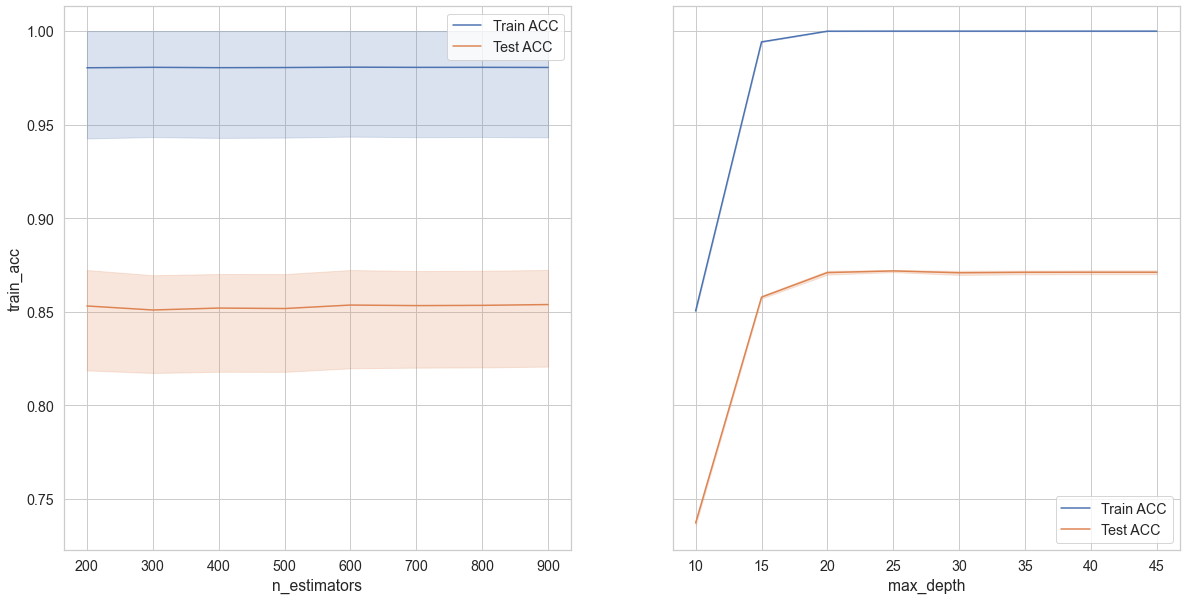

In [76]:
# Esto es para mostrar los resultados en una gráfica
fig, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
sns.lineplot(data=rf_scores, x='n_estimators', y='train_acc', ax=ax[0], label='Train ACC')
sns.lineplot(data=rf_scores, x='n_estimators', y='test_acc', ax=ax[0], label='Test ACC')
ax[0].set_ylabel='ACC'
ax[0].legend()

sns.lineplot(data=rf_scores, x='max_depth', y='train_acc', ax=ax[1], label='Train ACC')
sns.lineplot(data=rf_scores, x='max_depth', y='test_acc', ax=ax[1], label='Test ACC')
ax[1].legend()

In [52]:
rf = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA()),
                ('tree', RandomForestClassifier(n_estimators=600, max_depth=30, random_state=seed))])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.8914454277286136

In [62]:
X_scaled = MinMaxScaler().fit_transform(X_train)
X_pca = PCA().fit_transform(X_scaled)
rf_model = RandomForestClassifier(n_estimators=600, max_depth=30, random_state=seed)

scores = cross_val_score(rf_model, X_pca, y_train, cv=5, scoring='accuracy')
scores

array([0.98063624, 0.98086676, 0.97879207, 0.97763431, 0.98455153])

In [63]:
print("%0.2f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.002
